**Chapter 10 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [5]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(r"C:\Users\Administrator\Desktop\Learning", fig_id)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([1])

Saving figure perceptron_iris_plot


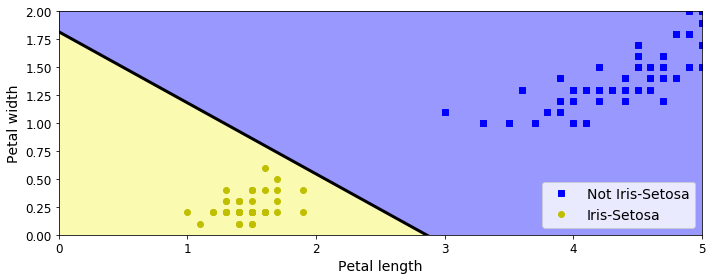

In [8]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


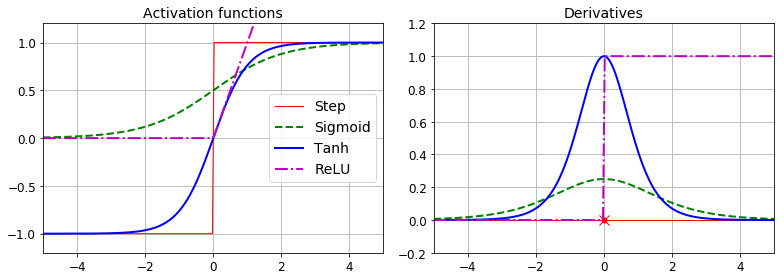

In [10]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [11]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

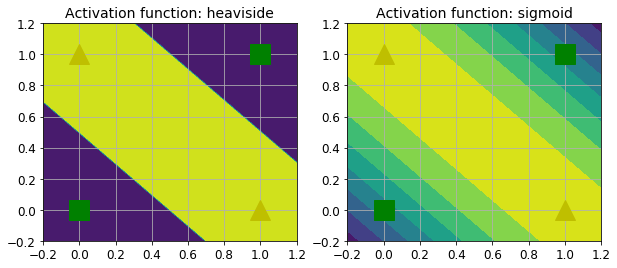

In [12]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## Using the Estimator API (formerly `tf.contrib.learn`)

In [13]:
import tensorflow as tf

D:\Anaconda\envs\tensorbase\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorbase\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorbase\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorbase\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

**Warning**: `tf.examples.tutorials.mnist` is deprecated. We will use `tf.keras.datasets.mnist` instead. Moreover, the `tf.contrib.learn` API was promoted to `tf.estimators` and `tf.feature_columns`, and it has changed considerably. In particular, there is no `infer_real_valued_columns_from_input()` function or `SKCompat` class.

In [54]:
#(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:70000]
y_test = y[60000:70000]

np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]
rnd_idx = np.random.permutation(10000)
X_test = X_test[rnd_idx]
y_test = y_test[rnd_idx]

X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [55]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_experimental_distribute': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002BDD4B15860>, '_task_id': 0, '_evaluation_master': '', '_log_step_count_steps': 100, '_num_worker_replicas': 1, '_experimental_max_worker_delay_secs': None, '_tf_random_seed': None, '_is_chief': True, '_global_id_in_cluster': 0, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_train_distribute': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_device_fn': None, '_eval_distribute': None, '_protocol': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_task_type': 'worker', '_service': None, '_model_dir': 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpmxbgx8vk'}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done

INFO:tensorflow:global_step/sec: 211.538
INFO:tensorflow:loss = 3.9640036, step = 1601 (0.474 sec)
INFO:tensorflow:global_step/sec: 208.019
INFO:tensorflow:loss = 2.3186114, step = 1701 (0.485 sec)
INFO:tensorflow:global_step/sec: 208.452
INFO:tensorflow:loss = 3.9647796, step = 1801 (0.476 sec)
INFO:tensorflow:global_step/sec: 227.921
INFO:tensorflow:loss = 0.46616676, step = 1901 (0.441 sec)
INFO:tensorflow:global_step/sec: 220.391
INFO:tensorflow:loss = 3.8691561, step = 2001 (0.453 sec)
INFO:tensorflow:global_step/sec: 198.526
INFO:tensorflow:loss = 1.365145, step = 2101 (0.502 sec)
INFO:tensorflow:global_step/sec: 269.695
INFO:tensorflow:loss = 3.7294493, step = 2201 (0.371 sec)
INFO:tensorflow:global_step/sec: 261.244
INFO:tensorflow:loss = 1.5572052, step = 2301 (0.383 sec)
INFO:tensorflow:global_step/sec: 261.249
INFO:tensorflow:loss = 2.8499846, step = 2401 (0.382 sec)
INFO:tensorflow:global_step/sec: 268.97
INFO:tensorflow:loss = 1.1753718, step = 2501 (0.373 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 271.157
INFO:tensorflow:loss = 0.42361075, step = 9901 (0.371 sec)
INFO:tensorflow:global_step/sec: 264.001
INFO:tensorflow:loss = 1.5040148, step = 10001 (0.377 sec)
INFO:tensorflow:global_step/sec: 258.548
INFO:tensorflow:loss = 0.03234113, step = 10101 (0.387 sec)
INFO:tensorflow:global_step/sec: 273.38
INFO:tensorflow:loss = 0.38498285, step = 10201 (0.366 sec)
INFO:tensorflow:global_step/sec: 274.131
INFO:tensorflow:loss = 0.14997585, step = 10301 (0.365 sec)
INFO:tensorflow:global_step/sec: 280.272
INFO:tensorflow:loss = 0.19120504, step = 10401 (0.357 sec)
INFO:tensorflow:global_step/sec: 271.892
INFO:tensorflow:loss = 0.06705425, step = 10501 (0.368 sec)
INFO:tensorflow:global_step/sec: 277.167
INFO:tensorflow:loss = 0.24933021, step = 10601 (0.361 sec)
INFO:tensorflow:global_step/sec: 277.939
INFO:tensorflow:loss = 0.04659154, step = 10701 (0.360 sec)
INFO:tensorflow:global_step/sec: 272.635
INFO:tensorflow:loss = 0.041692555, step = 10801 (0.3

INFO:tensorflow:loss = 0.32624045, step = 18001 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.558
INFO:tensorflow:loss = 0.021170307, step = 18101 (0.391 sec)
INFO:tensorflow:global_step/sec: 274.129
INFO:tensorflow:loss = 0.080622114, step = 18201 (0.363 sec)
INFO:tensorflow:global_step/sec: 257.218
INFO:tensorflow:loss = 0.07484144, step = 18301 (0.390 sec)
INFO:tensorflow:global_step/sec: 247.666
INFO:tensorflow:loss = 0.22107893, step = 18401 (0.404 sec)
INFO:tensorflow:global_step/sec: 260.562
INFO:tensorflow:loss = 0.05106312, step = 18501 (0.384 sec)
INFO:tensorflow:global_step/sec: 264.008
INFO:tensorflow:loss = 0.016565781, step = 18601 (0.378 sec)
INFO:tensorflow:global_step/sec: 249.519
INFO:tensorflow:loss = 0.018333916, step = 18701 (0.402 sec)
INFO:tensorflow:global_step/sec: 252.667
INFO:tensorflow:loss = 0.050564982, step = 18801 (0.396 sec)
INFO:tensorflow:global_step/sec: 226.376
INFO:tensorflow:loss = 0.0230366, step = 18901 (0.442 sec)
INFO:tensorflow:global_step

INFO:tensorflow:loss = 0.026329083, step = 26101 (0.369 sec)
INFO:tensorflow:global_step/sec: 269.697
INFO:tensorflow:loss = 0.03340494, step = 26201 (0.371 sec)
INFO:tensorflow:global_step/sec: 256.554
INFO:tensorflow:loss = 0.038206127, step = 26301 (0.390 sec)
INFO:tensorflow:global_step/sec: 242.273
INFO:tensorflow:loss = 0.01289421, step = 26401 (0.414 sec)
INFO:tensorflow:global_step/sec: 255.901
INFO:tensorflow:loss = 0.09876972, step = 26501 (0.389 sec)
INFO:tensorflow:global_step/sec: 273.379
INFO:tensorflow:loss = 0.024255618, step = 26601 (0.367 sec)
INFO:tensorflow:global_step/sec: 252.033
INFO:tensorflow:loss = 0.050112095, step = 26701 (0.397 sec)
INFO:tensorflow:global_step/sec: 241.101
INFO:tensorflow:loss = 0.0014109539, step = 26801 (0.415 sec)
INFO:tensorflow:global_step/sec: 209.765
INFO:tensorflow:loss = 0.07419607, step = 26901 (0.479 sec)
INFO:tensorflow:global_step/sec: 218.944
INFO:tensorflow:loss = 0.03207572, step = 27001 (0.456 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.053022098, step = 34201 (0.358 sec)
INFO:tensorflow:global_step/sec: 262.617
INFO:tensorflow:loss = 0.026222952, step = 34301 (0.380 sec)
INFO:tensorflow:global_step/sec: 278.706
INFO:tensorflow:loss = 0.003020537, step = 34401 (0.360 sec)
INFO:tensorflow:global_step/sec: 271.162
INFO:tensorflow:loss = 0.03547211, step = 34501 (0.369 sec)
INFO:tensorflow:global_step/sec: 269.696
INFO:tensorflow:loss = 0.0028692642, step = 34601 (0.370 sec)
INFO:tensorflow:global_step/sec: 279.489
INFO:tensorflow:loss = 0.022002863, step = 34701 (0.358 sec)
INFO:tensorflow:global_step/sec: 281.056
INFO:tensorflow:loss = 0.036183402, step = 34801 (0.357 sec)
INFO:tensorflow:global_step/sec: 269.698
INFO:tensorflow:loss = 0.060100596, step = 34901 (0.371 sec)
INFO:tensorflow:global_step/sec: 278.711
INFO:tensorflow:loss = 0.0069187656, step = 35001 (0.359 sec)
INFO:tensorflow:global_step/sec: 264.702
INFO:tensorflow:loss = 0.030211018, step = 35101 (0.379 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 271.158
INFO:tensorflow:loss = 0.0038474593, step = 42301 (0.369 sec)
INFO:tensorflow:global_step/sec: 265.403
INFO:tensorflow:loss = 0.010851089, step = 42401 (0.376 sec)
INFO:tensorflow:global_step/sec: 287.522
INFO:tensorflow:loss = 0.01744933, step = 42501 (0.349 sec)
INFO:tensorflow:global_step/sec: 277.167
INFO:tensorflow:loss = 0.009125307, step = 42601 (0.360 sec)
INFO:tensorflow:global_step/sec: 268.969
INFO:tensorflow:loss = 0.0077304505, step = 42701 (0.373 sec)
INFO:tensorflow:global_step/sec: 280.27
INFO:tensorflow:loss = 0.009714702, step = 42801 (0.357 sec)
INFO:tensorflow:global_step/sec: 279.49
INFO:tensorflow:loss = 0.022432271, step = 42901 (0.358 sec)
INFO:tensorflow:global_step/sec: 268.253
INFO:tensorflow:loss = 0.016344508, step = 43001 (0.372 sec)
INFO:tensorflow:global_step/sec: 279.488
INFO:tensorflow:loss = 0.011650521, step = 43101 (0.359 sec)
INFO:tensorflow:global_step/sec: 280.271
INFO:tensorflow:loss = 0.00907383, step = 

In [18]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-30T11:58:44Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmp44cp_8tw\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-30-11:58:45
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9793, average_loss = 0.10686315, global_step = 44000, loss = 13.52698
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\ADMINI~1\AppData\Local\Temp\tmp44cp_8tw\model.ckpt-44000


In [56]:
eval_results

{'accuracy': 0.9793,
 'average_loss': 0.10686315,
 'global_step': 44000,
 'loss': 13.52698}

In [20]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmp44cp_8tw\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object),
 'class_ids': array([6], dtype=int64),
 'classes': array([b'6'], dtype=object),
 'logits': array([ -1.3403383 ,  -5.6582403 ,   6.5742264 ,  -7.5172997 ,
         -5.3827047 ,   0.08637285,  29.23914   , -20.39481   ,
        -14.597132  , -21.856516  ], dtype=float32),
 'probabilities': array([5.2420572e-14, 6.9865067e-16, 1.4346742e-10, 1.0886325e-16,
        9.2028774e-16, 2.1833033e-13, 1.0000000e+00, 2.7813120e-22,
        9.1653370e-20, 6.4481920e-23], dtype=float32)}

## Using plain TensorFlow

In [21]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [22]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [23]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [24]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [25]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [26]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [27]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [28]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [29]:
n_epochs = 40
batch_size = 50

In [30]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [31]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9086
1 Batch accuracy: 0.94 Val accuracy: 0.9298
2 Batch accuracy: 1.0 Val accuracy: 0.9384
3 Batch accuracy: 0.98 Val accuracy: 0.9468
4 Batch accuracy: 0.98 Val accuracy: 0.9492
5 Batch accuracy: 0.98 Val accuracy: 0.952
6 Batch accuracy: 0.92 Val accuracy: 0.9576
7 Batch accuracy: 0.98 Val accuracy: 0.9594
8 Batch accuracy: 0.94 Val accuracy: 0.9596
9 Batch accuracy: 0.96 Val accuracy: 0.9618
10 Batch accuracy: 0.96 Val accuracy: 0.9652
11 Batch accuracy: 1.0 Val accuracy: 0.9644
12 Batch accuracy: 0.94 Val accuracy: 0.9662
13 Batch accuracy: 0.96 Val accuracy: 0.9668
14 Batch accuracy: 0.98 Val accuracy: 0.9666
15 Batch accuracy: 0.96 Val accuracy: 0.9682
16 Batch accuracy: 0.98 Val accuracy: 0.9664
17 Batch accuracy: 1.0 Val accuracy: 0.967
18 Batch accuracy: 0.98 Val accuracy: 0.9692
19 Batch accuracy: 1.0 Val accuracy: 0.969
20 Batch accuracy: 0.98 Val accuracy: 0.9694
21 Batch accuracy: 1.0 Val accuracy: 0.9708
22 Batch accuracy: 0.98 Val a

In [32]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [33]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [6 4 8 5 9 9 7 9 3 2 2 7 1 5 6 9 8 2 7 4]
Actual classes:    [6 9 8 5 9 9 7 9 3 2 2 7 1 5 6 9 8 2 7 4]


In [43]:
from tensorflow_graph_in_jupyter import show_graph

In [44]:
show_graph(tf.get_default_graph())

In [1]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np    

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.compat.v1.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [2]:
show_graph(tf.get_default_graph())

NameError: name 'tf' is not defined

## Using `dense()` instead of `neuron_layer()`

Note: previous releases of the book used `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [45]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [46]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [47]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.dense instead.


In [48]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [49]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [50]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [51]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [52]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.88 Validation accuracy: 0.8974
1 Batch accuracy: 0.92 Validation accuracy: 0.917
2 Batch accuracy: 1.0 Validation accuracy: 0.9304
3 Batch accuracy: 0.98 Validation accuracy: 0.9376
4 Batch accuracy: 0.96 Validation accuracy: 0.9412
5 Batch accuracy: 0.92 Validation accuracy: 0.9456
6 Batch accuracy: 0.92 Validation accuracy: 0.9508
7 Batch accuracy: 0.98 Validation accuracy: 0.9538
8 Batch accuracy: 0.92 Validation accuracy: 0.9578
9 Batch accuracy: 0.98 Validation accuracy: 0.9596
10 Batch accuracy: 0.96 Validation accuracy: 0.9626
11 Batch accuracy: 1.0 Validation accuracy: 0.9622
12 Batch accuracy: 0.94 Validation accuracy: 0.9648
13 Batch accuracy: 0.94 Validation accuracy: 0.966
14 Batch accuracy: 0.98 Validation accuracy: 0.966
15 Batch accuracy: 0.92 Validation accuracy: 0.967
16 Batch accuracy: 0.96 Validation accuracy: 0.9656
17 Batch accuracy: 1.0 Validation accuracy: 0.967
18 Batch accuracy: 0.96 Validation accuracy: 0.9678
19 Batch accuracy: 0.98 Valida

In [53]:
show_graph(tf.get_default_graph())

# Exercise solutions

## 1. to 8.

See appendix A.

## 9.

_Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on)._

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [39]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [40]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [41]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [42]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [43]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [44]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [45]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [46]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [47]:
logdir = log_dir("mnist_dnn")

Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

In [48]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need to use the validation set.

In [49]:
m, n = X_train.shape

In [50]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 92.180% 	Loss: 0.30208
Epoch: 5 	Validation accuracy: 95.980% 	Loss: 0.15037
Epoch: 10 	Validation accuracy: 97.100% 	Loss: 0.11160
Epoch: 15 	Validation accuracy: 97.700% 	Loss: 0.09562
Epoch: 20 	Validation accuracy: 97.840% 	Loss: 0.08309
Epoch: 25 	Validation accuracy: 98.040% 	Loss: 0.07706
Epoch: 30 	Validation accuracy: 98.140% 	Loss: 0.07287
Epoch: 35 	Validation accuracy: 98.280% 	Loss: 0.07133
Epoch: 40 	Validation accuracy: 98.220% 	Loss: 0.06968
Epoch: 45 	Validation accuracy: 98.220% 	Loss: 0.06993
Epoch: 50 	Validation accuracy: 98.160% 	Loss: 0.07093
Epoch: 55 	Validation accuracy: 98.280% 	Loss: 0.06994
Epoch: 60 	Validation accuracy: 98.200% 	Loss: 0.06894
Epoch: 65 	Validation accuracy: 98.260% 	Loss: 0.06906
Epoch: 70 	Validation accuracy: 98.220% 	Loss: 0.07057
Epoch: 75 	Validation accuracy: 98.280% 	Loss: 0.06963
Epoch: 80 	Validation accuracy: 98.320% 	Loss: 0.07264
Epoch: 85 	Validation accuracy: 98.200% 	Loss: 0.07403
Epoch: 90 	V

In [51]:
os.remove(checkpoint_epoch_path)

In [52]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [53]:
accuracy_val

0.9796